## Baseline Model
In this notebook, we explore the model described in [1]. This is a collaboration network of scientists posting preprints on the condensed matter archive at www.arxiv.org.  This version is based on preprints posted to the archive between January 1, 1995 and March 31, 2005.

[1] M. E. J. Newman, The structure of scientific collaboration networks, Proc. Natl. Acad. Sci. USA 98, 404-409 (2001)

### Setup

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from __future__ import print_function
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
from helper import * # helper functions

In [22]:
G = nx.read_edgelist('../data/collections/conda-mat/conda-mat-2005-edgelist.txt')

In [24]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 39577
Number of edges: 175692
Average degree:   8.8785


#### Graphing `condensed matter` network

In [25]:
pos = nx.spring_layout(G)

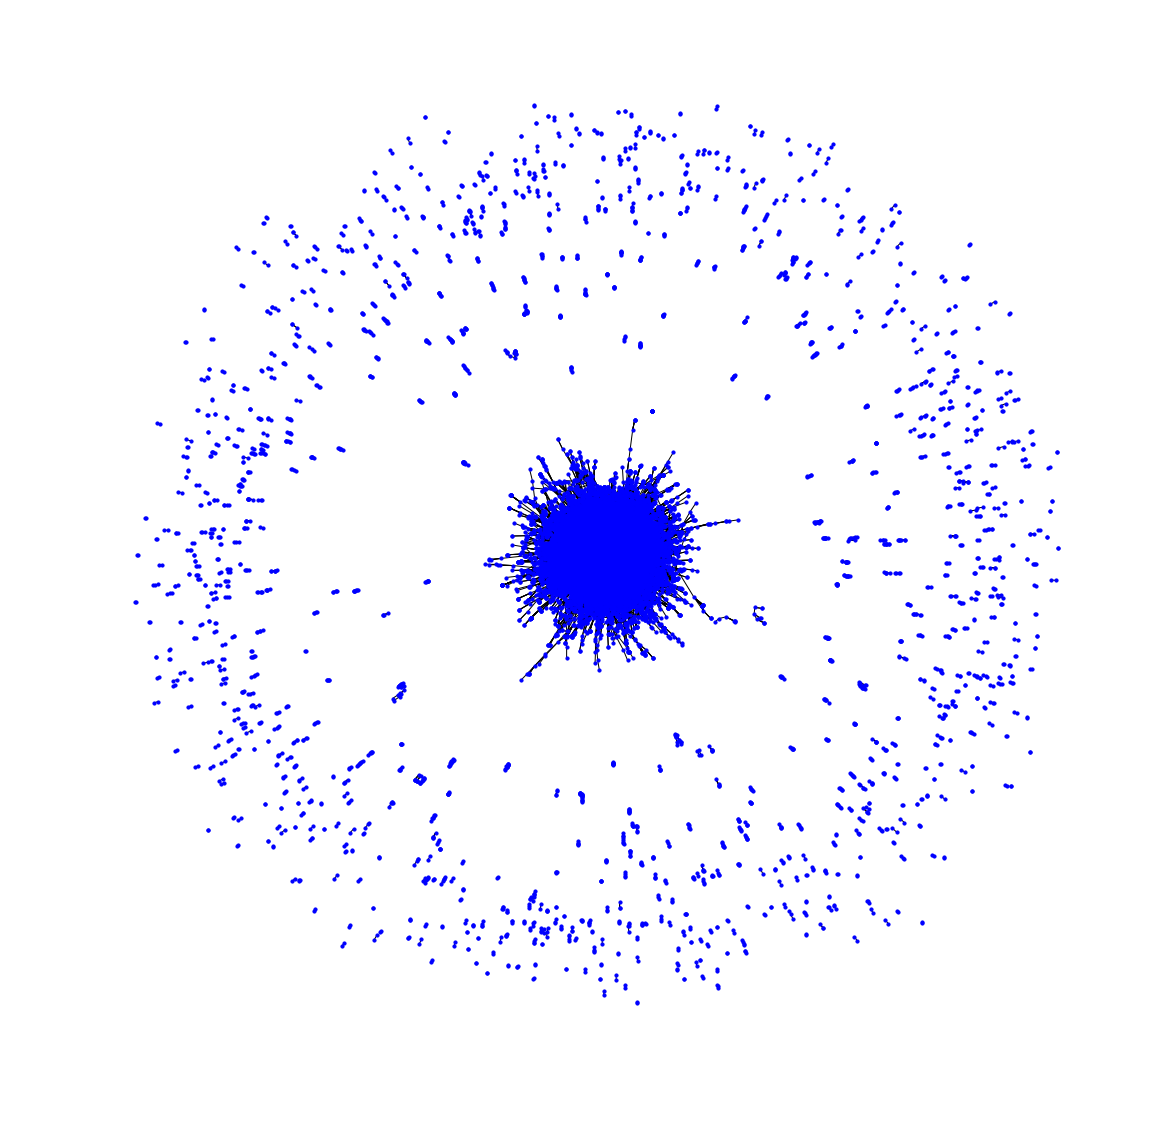

In [30]:
# Draw the graph:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111)
ax.axis('off')
nx.draw_networkx(
    G,
    pos=pos,
    with_labels=False,
    ax=ax,
    node_size=10,
    node_color='blue'
)

### Statistics

#### Degree distribution

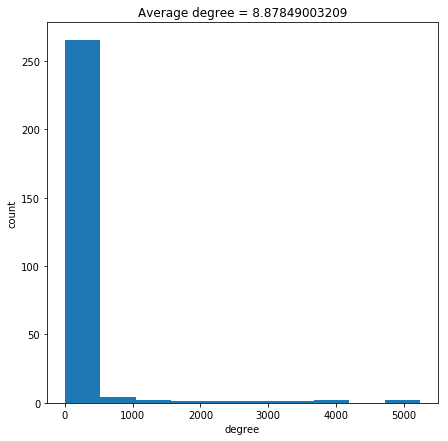

In [31]:
ax, degree_seq = degree_dist(G)

#### Clustering coefficients

In [32]:
cc = clustering_coeff(G)

In [33]:
print('average clustering coefficient: ', cc[1])

average clustering coefficient:  0.649729222781


### Connected components

In [34]:
gccs, percentage = generateGCC(G)

component 1: 92.12%
component 2: 0.05%
component 3: 0.05%
component 4: 0.04%
component 5: 0.04%
component 6: 0.04%
component 7: 0.04%
component 8: 0.03%
component 9: 0.03%
component 10: 0.03%
component 11: 0.03%
component 12: 0.03%
component 13: 0.03%
component 14: 0.03%
component 15: 0.03%
component 16: 0.03%
component 17: 0.03%
component 18: 0.03%
component 19: 0.03%
component 20: 0.03%
component 21: 0.02%
component 22: 0.02%
component 23: 0.02%
component 24: 0.02%
component 25: 0.02%
component 26: 0.02%
component 27: 0.02%
component 28: 0.02%
component 29: 0.02%
component 30: 0.02%
component 31: 0.02%
component 32: 0.02%
component 33: 0.02%
component 34: 0.02%
component 35: 0.02%
component 36: 0.02%
component 37: 0.02%
component 38: 0.02%
component 39: 0.02%
component 40: 0.02%
component 41: 0.02%
component 42: 0.02%
component 43: 0.02%
component 44: 0.02%
component 45: 0.02%
component 46: 0.02%
component 47: 0.02%
component 48: 0.02%
component 49: 0.02%
component 50: 0.02%
componen

limit_output extension: Maximum message size of 5000 exceeded with 19927 characters

In [37]:
print('Number of components: ', len(percentage))

Number of components:  954


### Giant Connected Component

In [35]:
main_gcc = gccs[0]
pos_gcc = nx.spring_layout(main_gcc)

In [38]:
print('number of nodes in largest connected component:', len(main_gcc))

number of nodes in largest connected component: 36458


In [39]:
print(nx.info(main_gcc))

Name: 
Type: Graph
Number of nodes: 36458
Number of edges: 171735
Average degree:   9.4210


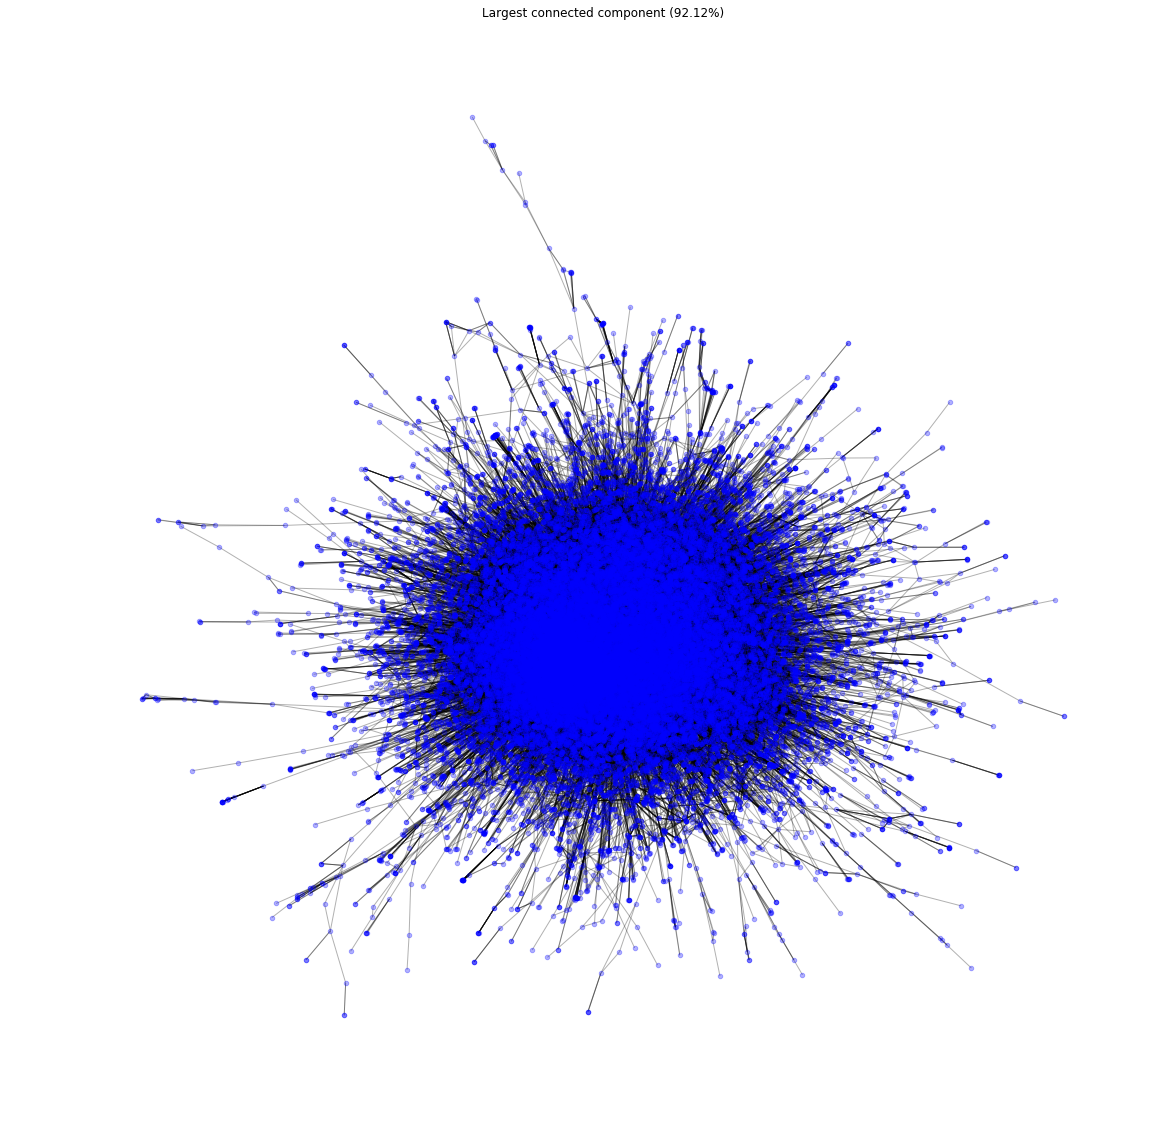

In [41]:
# Draw the graph:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111)
ax.axis('off')
nx.draw_networkx(
    main_gcc,
    pos=pos_gcc,
    with_labels=False,
    ax=ax,
    alpha=.3,
    node_size=20,
    node_color='blue'
)
ax.set_title('Largest connected component ({:.2%})'.format(percentage[0]));
plt.show()
plt.savefig("condData-LargestCC.pdf", format='pdf', 
            bbox_inches="tight")

#### Degree Distribution

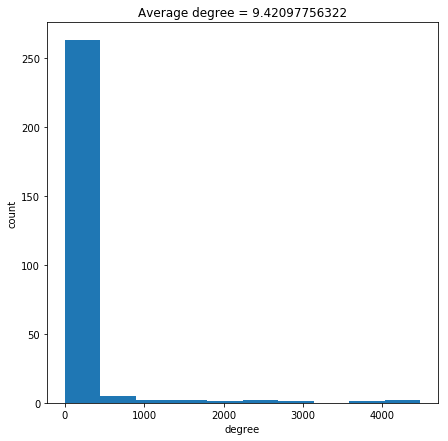

In [43]:
ax, degree_seq = degree_dist(main_gcc)

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


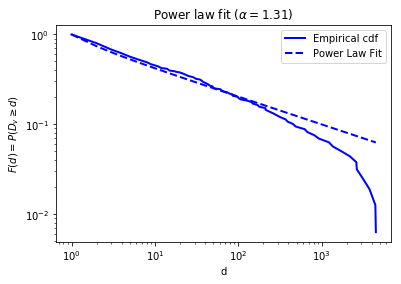

In [44]:
fig = power_law_fit(degree_seq)
plt.savefig("condData-LargestCC_DegreeDist.pdf", format='pdf', 
            bbox_inches="tight")

#### Clustering Coefficient

In [45]:
cc = clustering_coeff(main_gcc)

In [46]:
print('average clustering coefficient: ', cc[1])

average clustering coefficient:  0.65658861622


#### Average Path and Diameter

In [47]:
# Diameter:
print('Diameter of graph:', nx.diameter(main_gcc))

Diameter of graph: 18


In [48]:
nx.average_shortest_path_length(main_gcc) # AVERAGE PATH

5.499373530877049

In [49]:
degree_ass = nx.degree_assortativity_coefficient(main_gcc)
print('degree assortativity = ', degree_ass)

degree assortativity =  0.177382083932


#### Community detection

In [50]:
import community

In [51]:
# Community detection using modularity
parts = community.best_partition(main_gcc)
values = [parts.get(node) for node in main_gcc.nodes()]  
# assign each node to the community they belong to

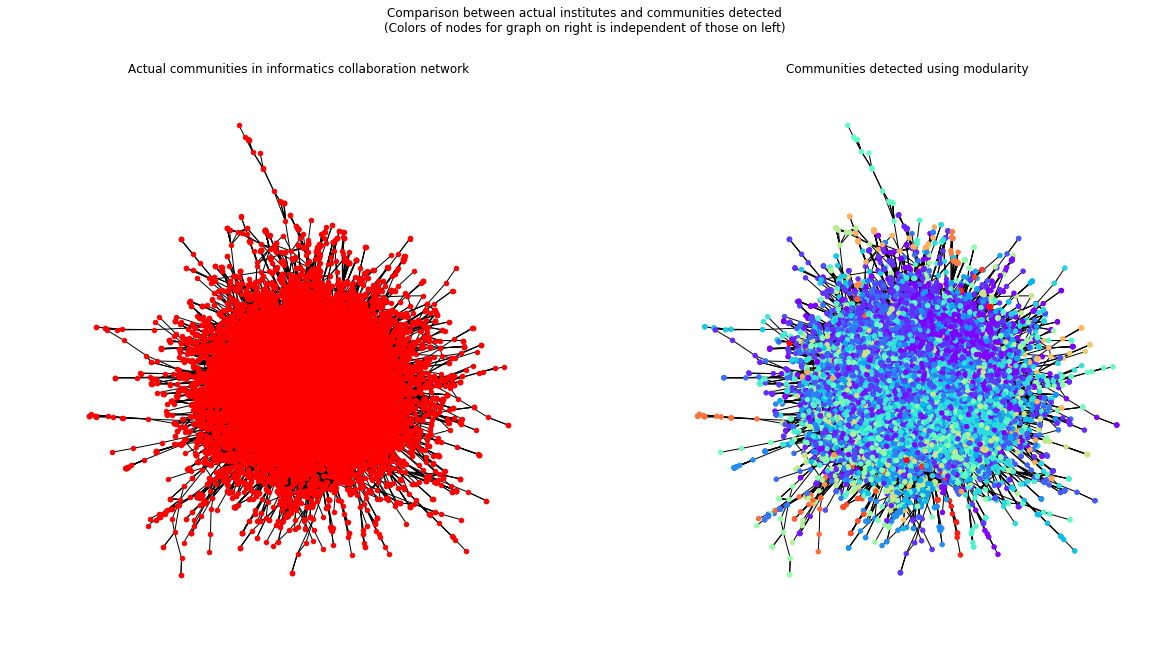

In [53]:
# Plot the graphs side by side:
fig = plt.figure(figsize=(20, 10))
fig.suptitle('Comparison between actual institutes and communities detected\n(Colors of nodes for graph on right is independent of those on left)')
ax1 = fig.add_subplot(121)
ax1.set_title('Actual communities in informatics collaboration network')
ax1.axis('off')
nx.draw_networkx(
    main_gcc,
    pos=pos_gcc,
    with_labels=False,
    ax=ax1,
    node_size=20
)


ax2 = fig.add_subplot(122)
ax2.set_title('Communities detected using modularity')
ax2.axis('off')
nx.draw_networkx(
    main_gcc,
    pos=pos_gcc,
    cmap=plt.get_cmap("rainbow"),
    ax=ax2,
    node_color=values,
    node_size=20,
    with_labels=False)
plt.show()
plt.savefig("condData-LargestCC_commCompare.pdf", format='pdf', 
            bbox_inches="tight")

In [54]:
num_comm = len(set(parts.values()))
print('Number of communities detected =', num_comm)

Number of communities detected = 80
